In [5]:
import cv2
import os
import numpy as np
# !pip install matplotlib
import matplotlib.pyplot as plt

In [4]:
!pip list


Package         Version 
--------------- --------
cycler          0.10.0  
dlib            19.19.0 
kiwisolver      1.2.0   
matplotlib      3.2.1   
numpy           1.18.2  
opencv-python   4.2.0.32
pip             20.0.2  
pkg-resources   0.0.0   
pyparsing       2.4.6   
python-dateutil 2.8.1   
setuptools      46.1.3  
six             1.14.0  
wheel           0.34.2  


(80, 80)


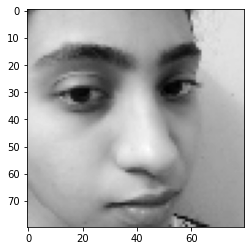

In [88]:
dataTrainX = []
dataTestX = []
dataTrainY = []
dataTestY = []
classwiseData={}
j=0
for folder in os.listdir('dataset'):
    classwiseData[folder]=[]
    tmp = []
    for file in os.listdir('dataset/'+folder+'/'):
        img  = cv2.imread('dataset/'+folder+'/'+file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        img =cv2.resize(img,(80,80))
        OrigDim = img.shape
        img = img.flatten()
        tmp.append(img)
    for i in range(len(tmp)):
       
        dataTrainX.append(tmp[i])
        dataTrainY.append(folder)
        classwiseData[folder].append(j)
        j+=1
        if(i>int(0.75*len(tmp))):
            dataTestX.append(tmp[i])
            dataTestY.append(folder)
dataTrainX = np.asarray(dataTrainX)
dataTrainY = np.asarray(dataTrainY)
dataTestX = np.asarray(dataTestX)
dataTestY = np.asarray(dataTestY)
print(OrigDim)
plt.imshow(dataTrainX[15].reshape(OrigDim), cmap = 'gray')


In [84]:
##training PCA
mean = np.mean(dataTrainX,axis=0)
deviationFromMean = (dataTrainX-mean)
covvar = np.dot(deviationFromMean.T,deviationFromMean)/len(deviationFromMean)
d,v,eigVec = np.linalg.svd(covvar)
print(eigVec.shape)
# # ##sorting eigen vectors
# EigenVecVal=[(eigVal[i],eigVec[i])for i in range(len(eigVal))]
# EigenVecVal.sort(reverse=True)
param=100
col=dataTrainX.shape[1]
W=np.ndarray(shape=(param,col))
for i in range(0,param):
    W[i,:] = eigVec[i,:]
W=np.transpose(W)
eigFaceMatrix = np.dot(dataTrainX,W)
covvar

(6400, 6400)


array([[1930.22900826, 1872.82791322, 1816.17444215, ...,  -28.56590909,
          -6.71991736,   13.74704545],
       [1872.82791322, 1876.45594525, 1842.19159607, ...,  -66.68409091,
         -43.15916322,   16.56176136],
       [1816.17444215, 1842.19159607, 1843.43077996, ...,  -85.78409091,
         -62.86591942,   10.96028409],
       ...,
       [ -28.56590909,  -66.68409091,  -85.78409091, ..., 2197.46363636,
        2060.65      , 1894.06136364],
       [  -6.71991736,  -43.15916322,  -62.86591942, ..., 2060.65      ,
        2119.29832645, 1974.35238636],
       [  13.74704545,   16.56176136,   10.96028409, ..., 1894.06136364,
        1974.35238636, 2075.65846591]])

In [85]:
##LDA
scatterWithin = np.zeros((param,param))
scatterBetween = np.zeros((param,param))
totalMean = np.mean(eigFaceMatrix,axis=0).reshape(param,1)

for label,i in classwiseData.items():
    classImages = np.copy(eigFaceMatrix[i])
    classMean=np.mean(classImages,axis=0).reshape(param,1)
    for img in classImages:
        img=img.reshape(param,1)
        scatterWithin += (img-classMean)@((img-classMean).T)
    scatterBetween += len(classImages)*((classMean - totalMean)@((classMean - totalMean).T))

J = np.linalg.inv(scatterWithin)@scatterBetween
d,v,eigVec = np.linalg.svd(J)

param2=50
col=param

W1=np.ndarray(shape=(param2,col))
for i in range(0,param2):
    W1[i,:] = eigVec[i,:]
W1=np.transpose(W1)
FisherMatrix = np.dot(eigFaceMatrix,W1)
FisherMatrix.shape


# W1=np.ndarray(shape=(param2,col))
# for i in range(0,param2):
#     W1[i,:] = eigVec[i,:]
# W1=np.transpose(W1)
# FisherMatrix = np.dot(eigFaceMatrix,W1)
# FisherMatrix.shape

(440, 50)

In [86]:
##saving the weights
np.savetxt('model/pcaWeights.txt', W, delimiter = ',')  

np.savetxt('model/ldaWeights.txt', W1, delimiter = ',') 


np.savetxt('model/TrainData.txt', FisherMatrix, delimiter = ',') 
np.savetxt('model/meanData.txt', mean, delimiter = ',') 


#read file into a matrix

# newW = np.loadtxt(open("model/pcaWeights.txt","rb"),delimiter=",",skiprows=0)

In [90]:
##load from pretrained model

W = np.loadtxt(open("model/pcaWeights.txt","rb"),delimiter=",",skiprows=0)
W1 = np.loadtxt(open("model/ldaWeights.txt","rb"),delimiter=",",skiprows=0)
FisherMatrix = np.loadtxt(open("model/TrainData.txt","rb"),delimiter=",",skiprows=0)
mean  = np.loadtxt(open("model/meanData.txt","rb"),delimiter=",",skiprows=0)

2.196480222796181e-11
Dhairya Dhairya
8.009744070342327e-12
Dhairya Dhairya
3.761464031801066e-11
Likhita Likhita
1.2447966531904124e-11
Likhita Likhita
1.2087416393727598e-11
s7 s7
1.1821229687451791e-11
s7 s7
6.597036316497845e-12
s27 s27
7.510705602515654e-12
s27 s27
1.284557018960023e-11
s33 s33
7.0876564433666384e-12
s33 s33
7.911599237855275e-12
s31 s31
1.1265397140860954e-11
s31 s31
1.0206042762083123e-11
s24 s24
7.044969415096894e-12
s24 s24
9.476874226524512e-12
s39 s39
1.0295323207305702e-11
s39 s39
1.165682876925707e-11
s17 s17
1.2484973887888176e-11
s17 s17
1.966460030767955e-11
s1 s1
7.097400796559925e-12
s1 s1
1.4084899947078498e-11
s18 s18
9.395323113759318e-12
s18 s18


/home/muskan/Desktop/IIT2017046_SOC2020_ASSIGNMENT_3/FaceRecog/envir/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1.6164717646935264e-11
s23 s23
9.111945300847623e-12
s23 s23
1.3699636164548992e-11
s21 s21
1.4607319606352982e-11
s21 s21
1.2657244527341428e-11
s5 s5
9.688539417587544e-12
s5 s5
6.601013002179107e-12
s13 s13
1.762824164637194e-11
s13 s13
1.1625503837206352e-11
s40 s40
9.346226106190388e-12
s40 s40
1.3237243142858301e-11
s3 s3
1.9722016954067493e-11
s3 s3
7.51162840536907e-12
s30 s30
9.072273675602636e-12
s30 s30
3.182972367188424e-11
aadya aadya
1.3721016260548266e-11
aadya aadya
1.3108260337142243e-11
s9 s9
1.1742513204853472e-11
s9 s9
1.204192602773302e-11
s8 s8
1.283027228976307e-11
s8 s8
7.206400138578449e-12
s35 s35
1.1834698387885645e-11
s35 s35
1.3513227730000943e-11
s15 s15
1.463791502561265e-11
s15 s15
1.9715648760524185e-11
s19 s19
1.7465222921079936e-11
s19 s19
1.3425774208347544e-11
s12 s12
2.7071815538434237e-11
s12 s12
6.854217205247276e-12
s37 s37
9.127948198929775e-12
s37 s37
9.691773613649506e-12
s2 s2
6.548184532712997e-12
s2 s2
1.129561164514241e-11
s36 s36
5.67882

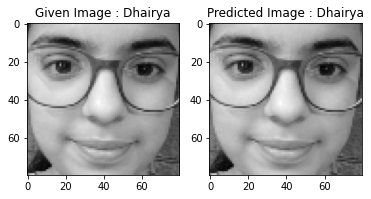

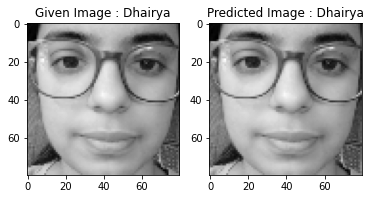

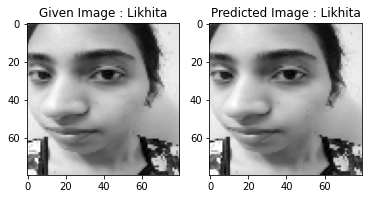

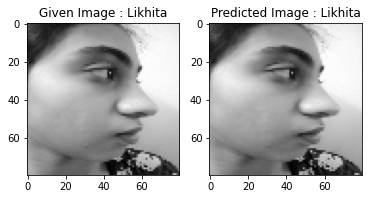

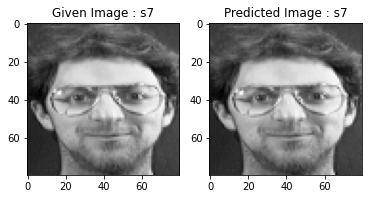

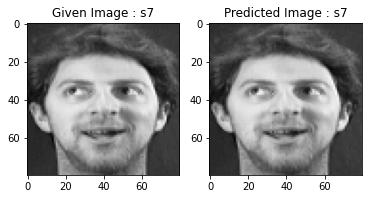

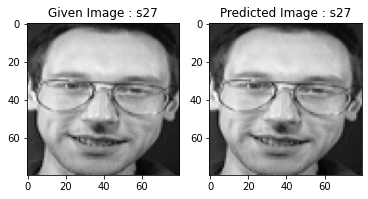

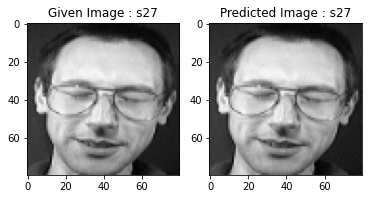

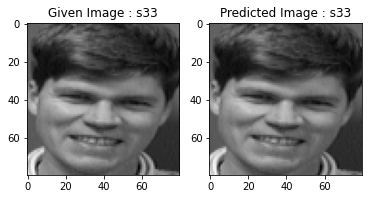

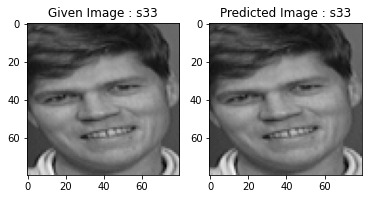

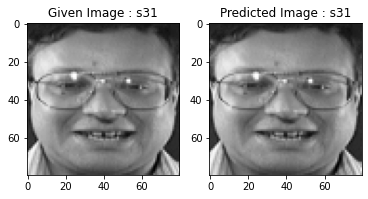

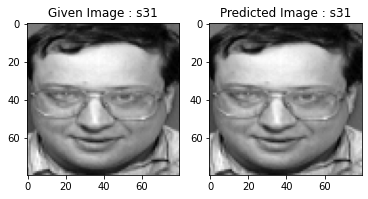

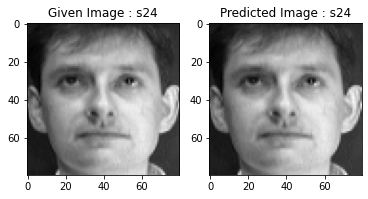

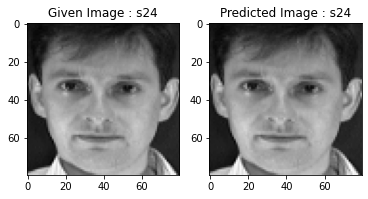

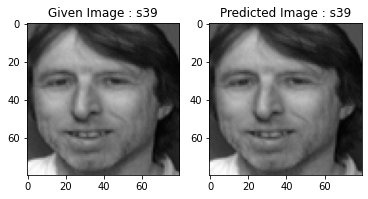

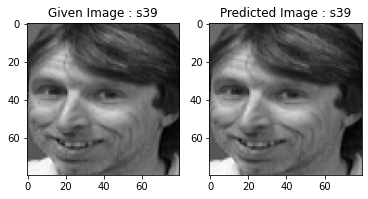

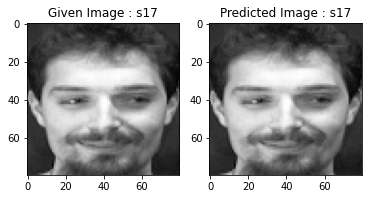

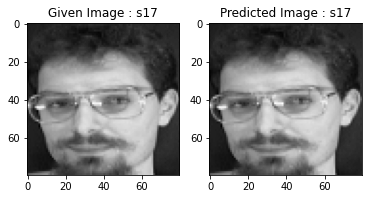

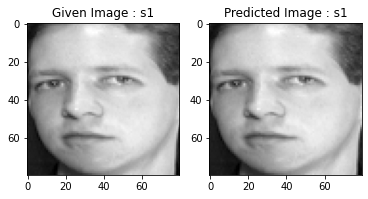

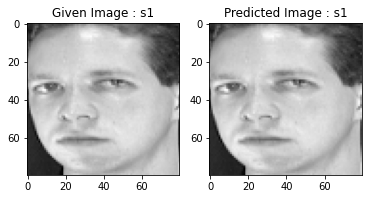

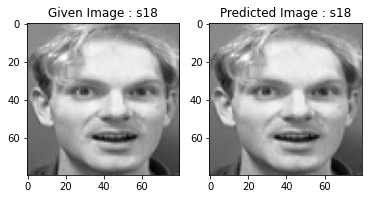

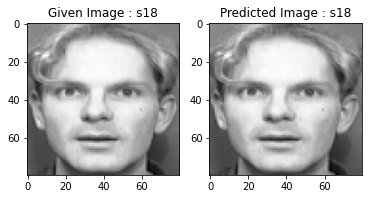

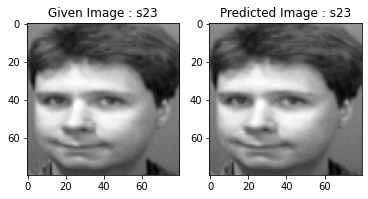

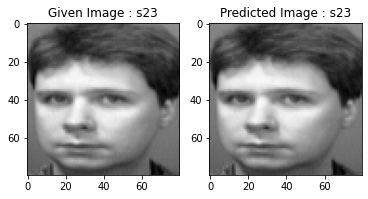

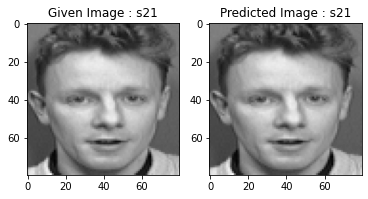

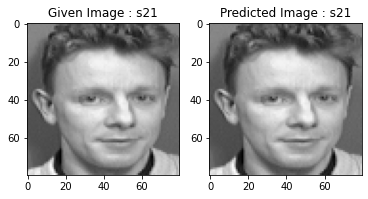

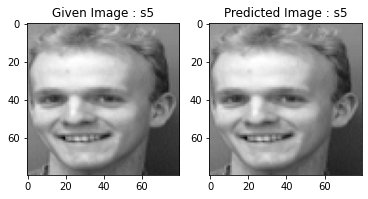

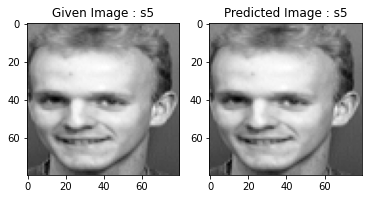

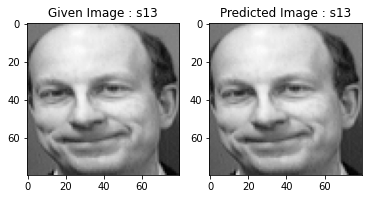

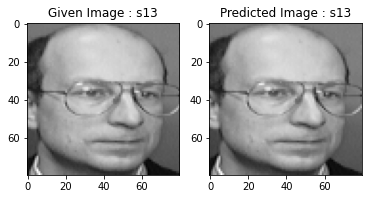

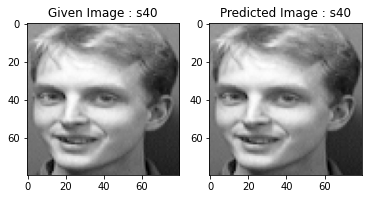

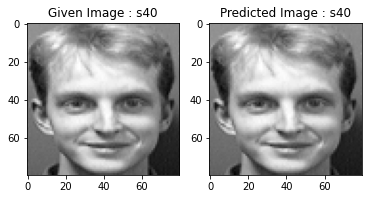

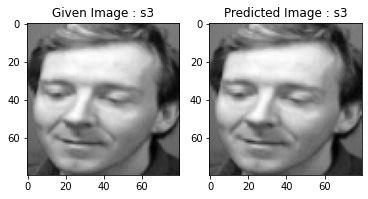

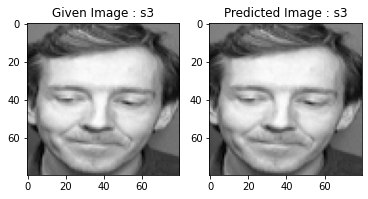

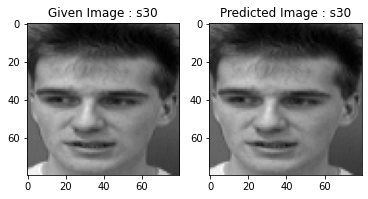

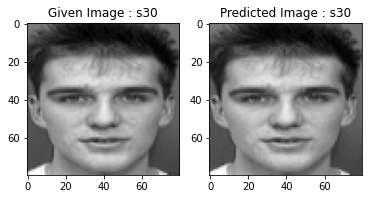

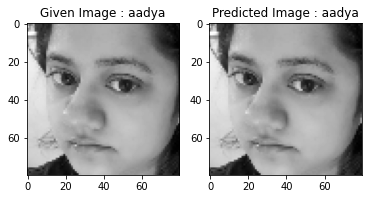

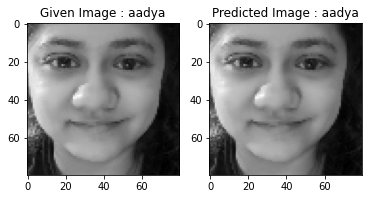

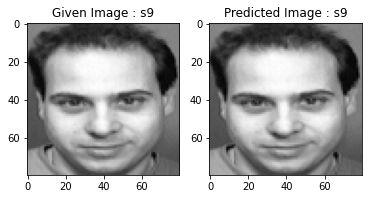

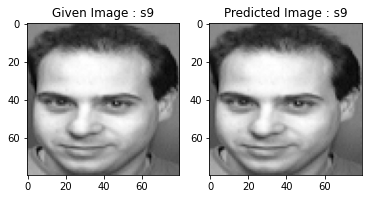

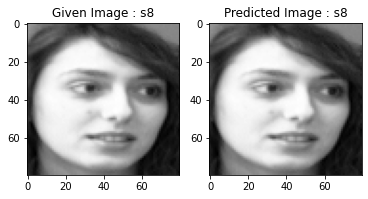

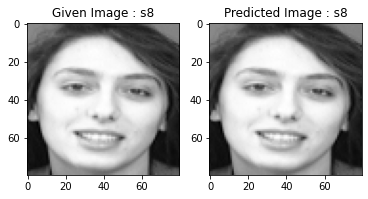

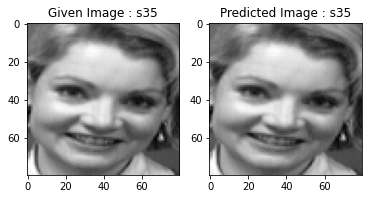

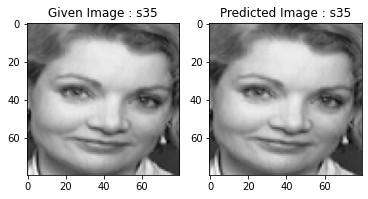

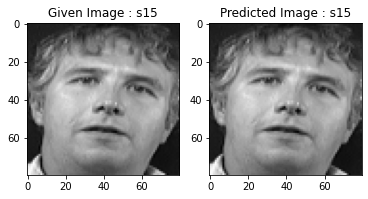

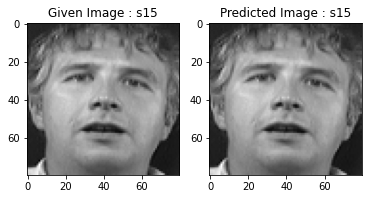

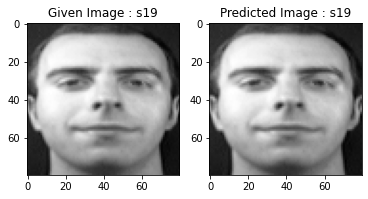

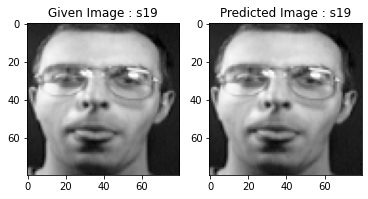

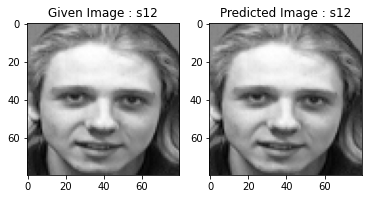

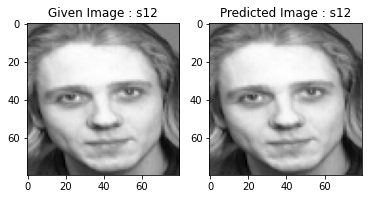

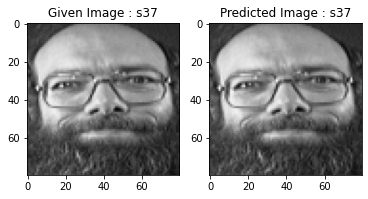

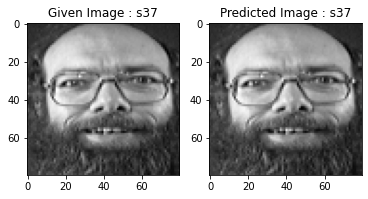

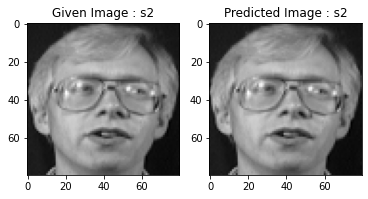

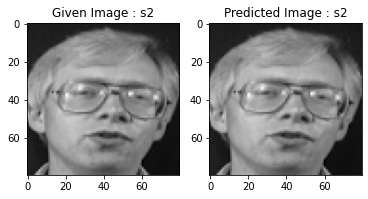

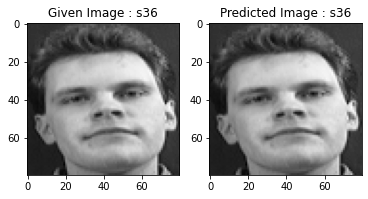

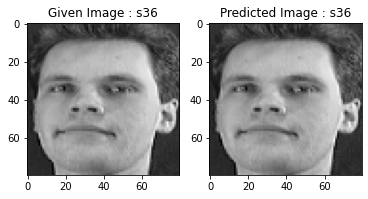

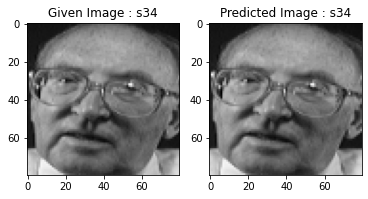

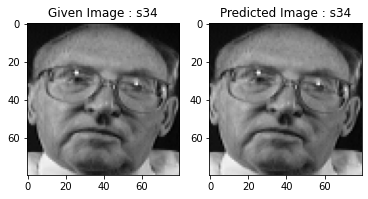

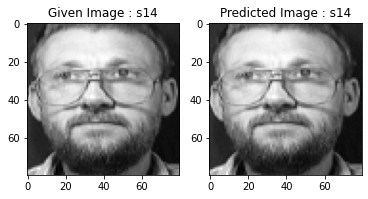

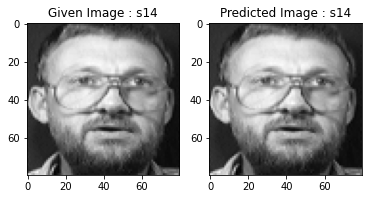

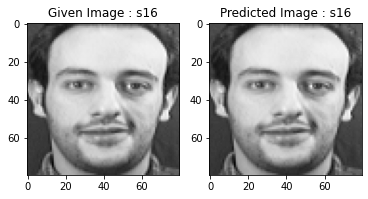

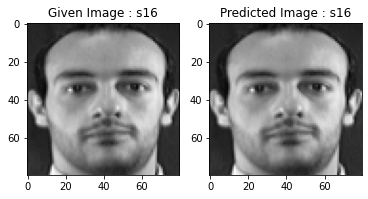

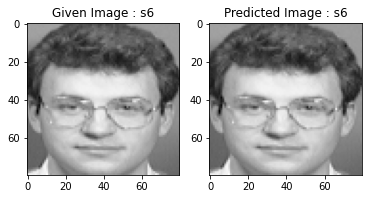

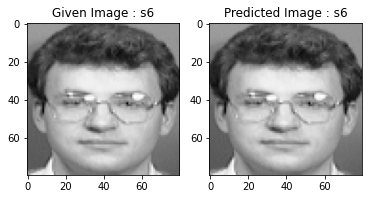

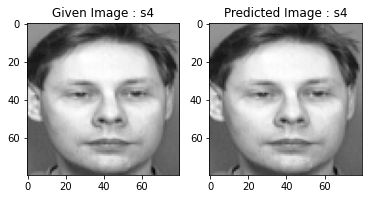

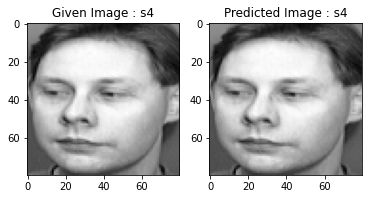

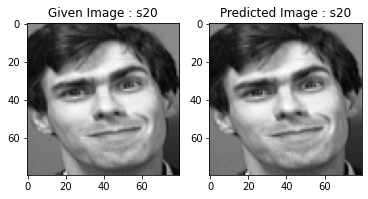

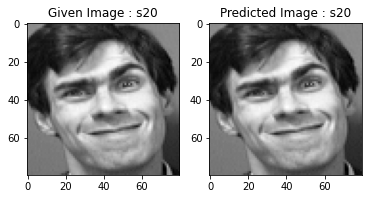

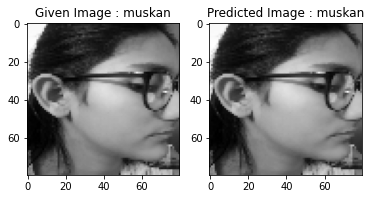

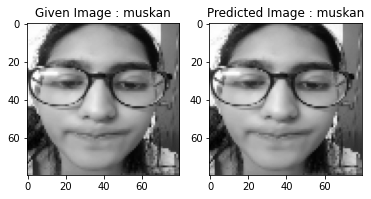

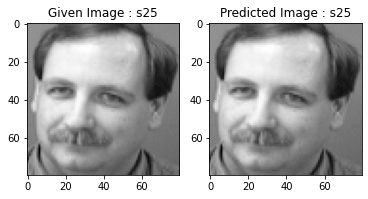

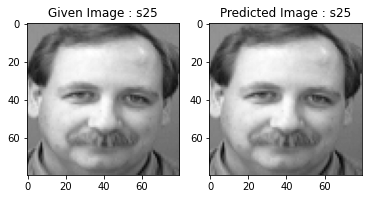

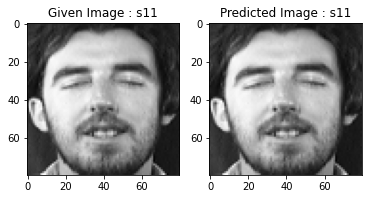

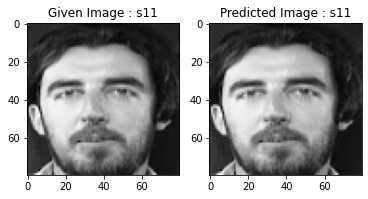

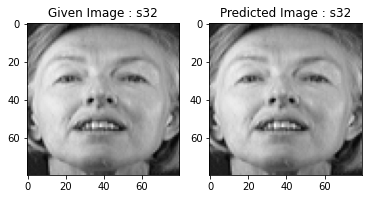

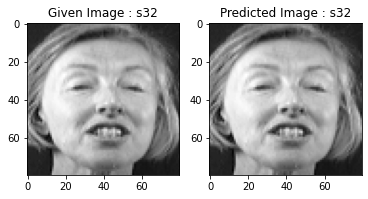

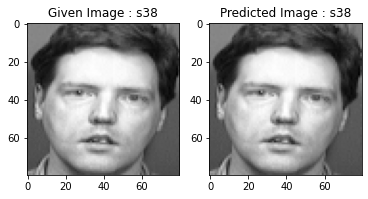

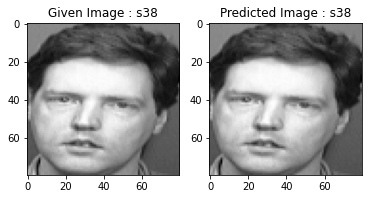

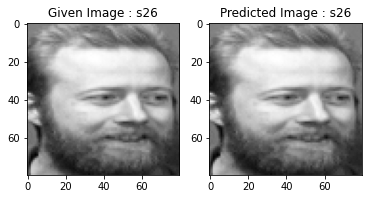

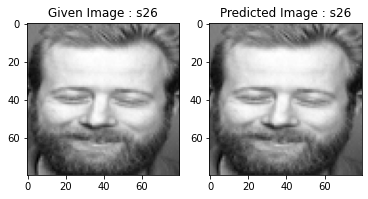

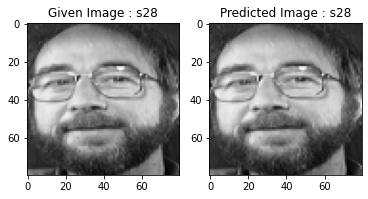

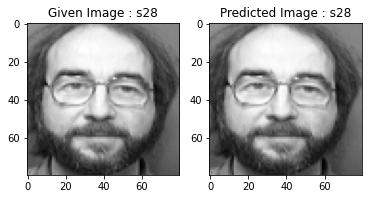

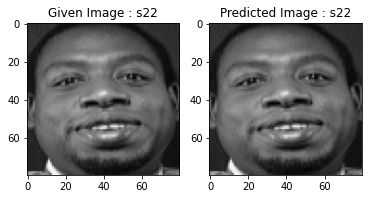

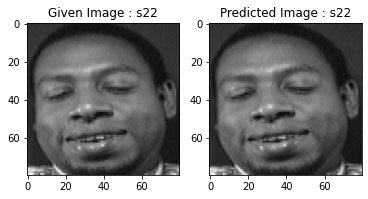

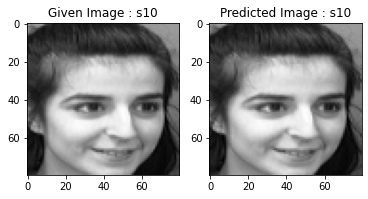

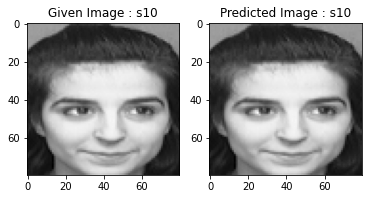

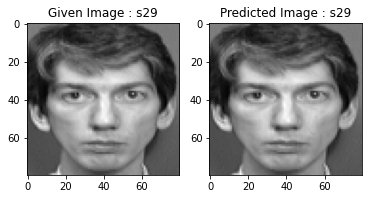

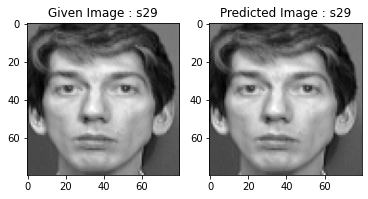

In [91]:
##testing
# import dlib
j = 0

correct= 0
ind = 0

for img in dataTestX:
    
    img = img.reshape((80,80))
    

        # initialize hog + svm based face detector
    hog_face_detector = dlib.get_frontal_face_detector()


    # apply face detection (hog)
    faces_hog = hog_face_detector(img, 1)



    # loop over detected faces

    for face in faces_hog:
        x = face.left()
        y = face.top()
        w = face.right() - x
        h = face.bottom() - y

        if(x<0):
            x=0
        if(y<0):
            y=0
        # draw box over face
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

        img = img[y:y+h, x:x+w]

    img = img.flatten()
    mindist=1e19
    deviationFromMean = (img-mean)
    eigTestimg = np.dot(img,W)
    FisherTestImg = np.dot(eigTestimg,W1)
    for i in range(0,dataTrainX.shape[0]):
        dist = np.linalg.norm(FisherMatrix[i]-FisherTestImg)
#         print(mindist,dist)
        if(dist<mindist):
            label = dataTrainY[i]
            mindist = dist
            ind = i;
    print(mindist)
    print(label,dataTestY[j])
    fig,ax = plt.subplots(nrows = 1, ncols = 2)
    ax[0].set_title('Given Image : ' + dataTestY[j])
    ax[0].imshow(img.reshape(OrigDim[0],OrigDim[1]), cmap='gray')
    
    ax[1].set_title('Predicted Image : ' + label)
    ax[1].imshow(dataTrainX[ind].reshape(OrigDim[0],OrigDim[1]), cmap='gray')
    if(label==dataTestY[j]):
        correct+= 1;
    j += 1
    
accuracy = (correct/dataTestX.shape[0])*100
print("Accuracy = "+str(accuracy))
print("correct predicted="+str(correct))
print("total test images = "+str(dataTestX.shape[0]))
    